In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdAbbreviations
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import AllChem, rdFMCS
from rdkit.Chem import rdDepictor

In [3]:

abbrevs = rdAbbreviations.GetDefaultAbbreviations()
custom_abbrevs = rdAbbreviations.ParseAbbreviations('''Ph c1ccccc1
''')
for abbrev in abbrevs:
    custom_abbrevs.append(abbrev)
abbrevs = custom_abbrevs
opts = rdMolDraw2D.MolDrawOptions()
opts.baseFontSize = 0.8  # 元素字母基础大小（相对值，默认 0.6）

In [4]:
reactant_csv = pd.read_csv("Data_clear_with_sites.csv")
binol_csv = reactant_csv.loc[reactant_csv["Type"] == "Binol"]
ligand_csv = reactant_csv.loc[(reactant_csv['Type']!= "Binol")]


In [16]:

opts = rdMolDraw2D.MolDrawOptions()
opts.baseFontSize = 0.8  # 元素字母基础大小（相对值，默认 0.6）
# opts.fixedBondLength = -1  # 键的长度（像素，>0 固定，默认 -1 为自动）

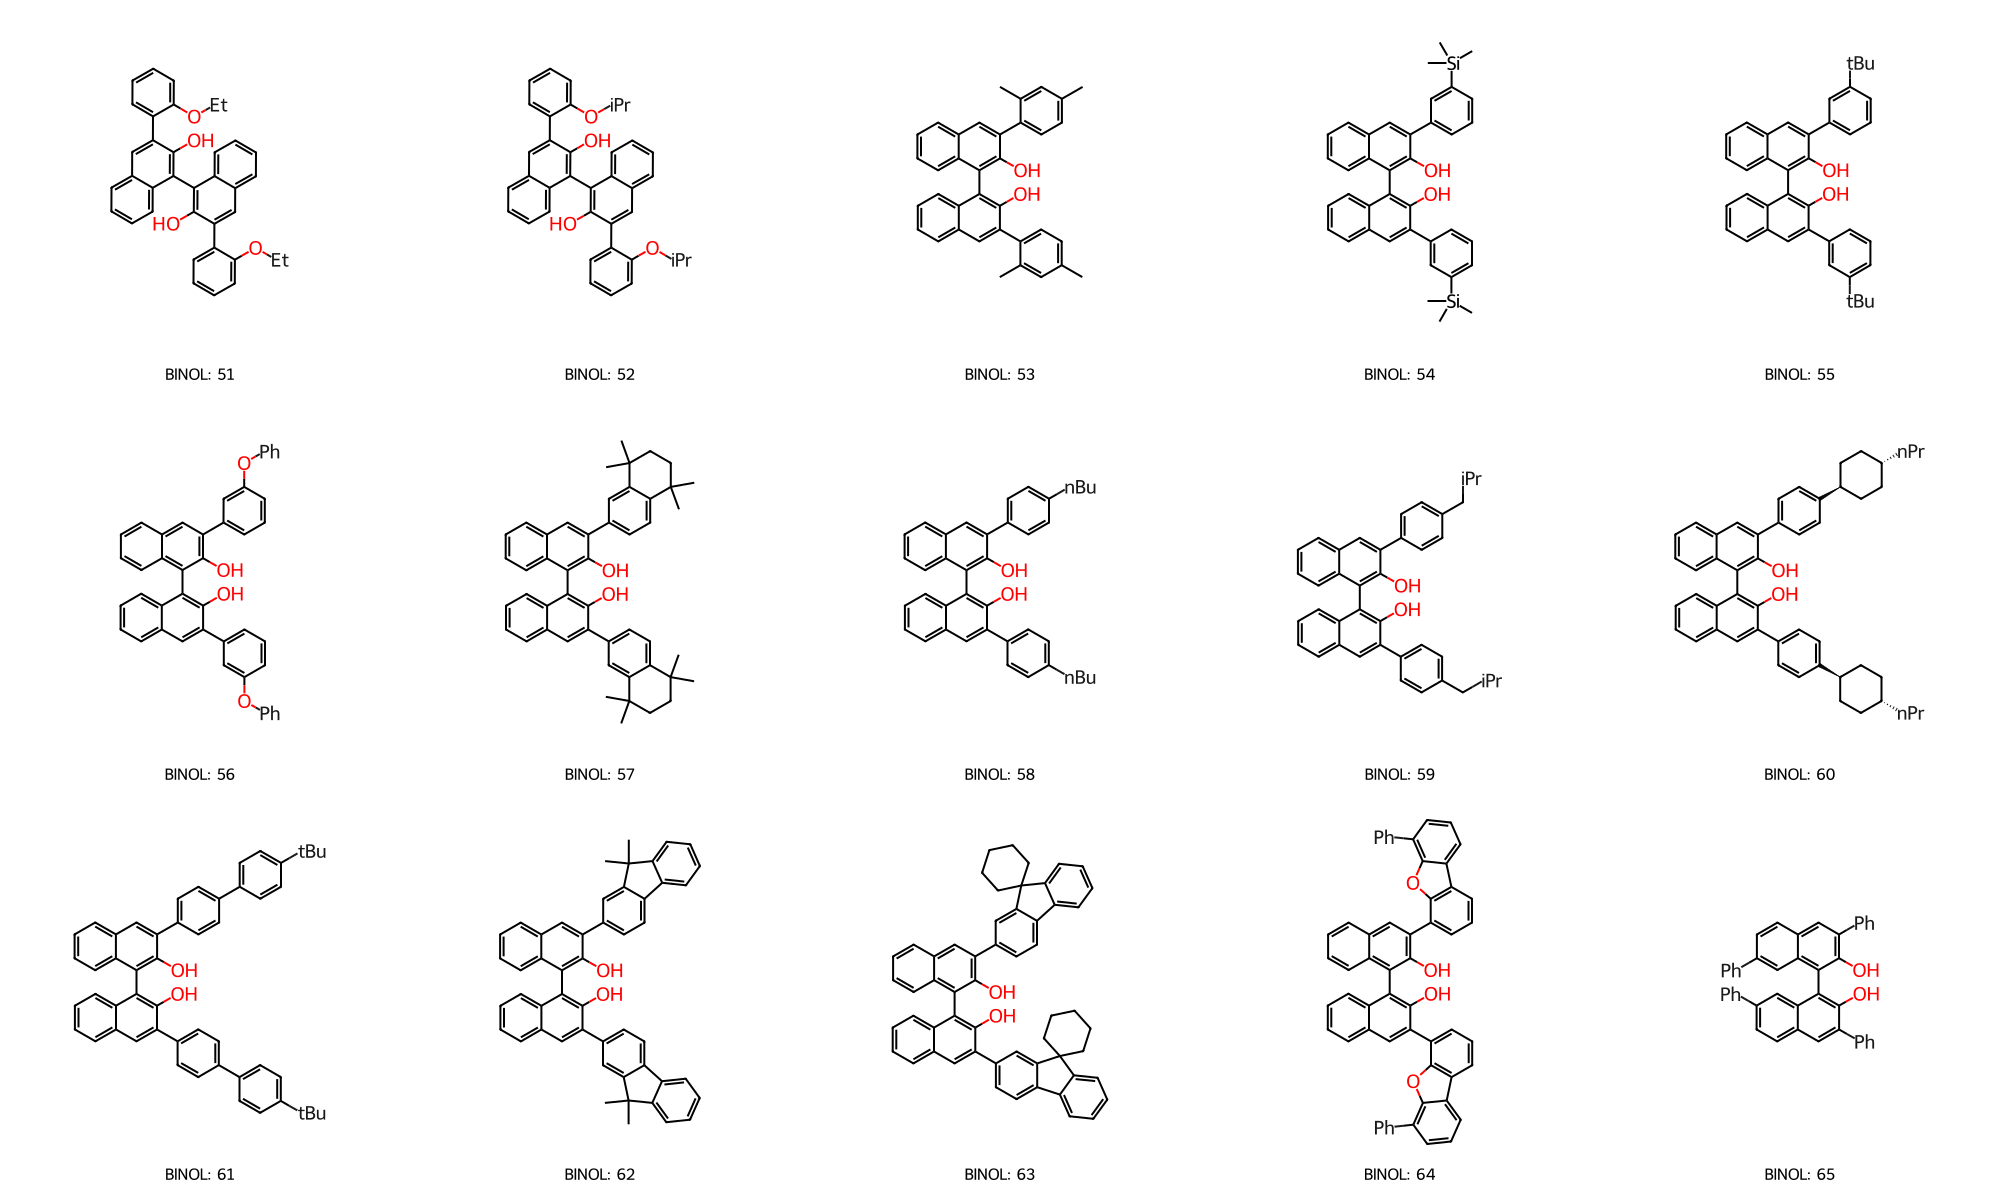

In [18]:

rdDepictor.SetPreferCoordGen(True)
start_id = 50
end_id = start_id + 50
csv_ = binol_csv

mols = [rdAbbreviations.CondenseMolAbbreviations(Chem.MolFromSmiles(each), abbrevs, maxCoverage=1) for each in csv_['Smiles']][start_id:end_id]
# template = Chem.MolFromSmarts("Oc1ccccc1-c1ccccc1O")
# AllChem.Compute2DCoords(template)
template = Chem.MolFromMolFile(f"Figure/BINOL_patten0.mol")

aligned_queries = []
for mol in mols:
    AllChem.Compute2DCoords(mol)  # 先计算初始坐标
    AllChem.GenerateDepictionMatching2DStructure(mol, template)  # 匹配模板
    aligned_queries.append(mol)
mols = aligned_queries
Chem.Draw.MolsToGridImage(mols, 
                          molsPerRow=5, subImgSize=(400, 400), useSVG=True, 
                          legends = ["BINOL: " + str(each) for each in csv_['Index']][start_id:end_id], 
                          drawOptions=opts)

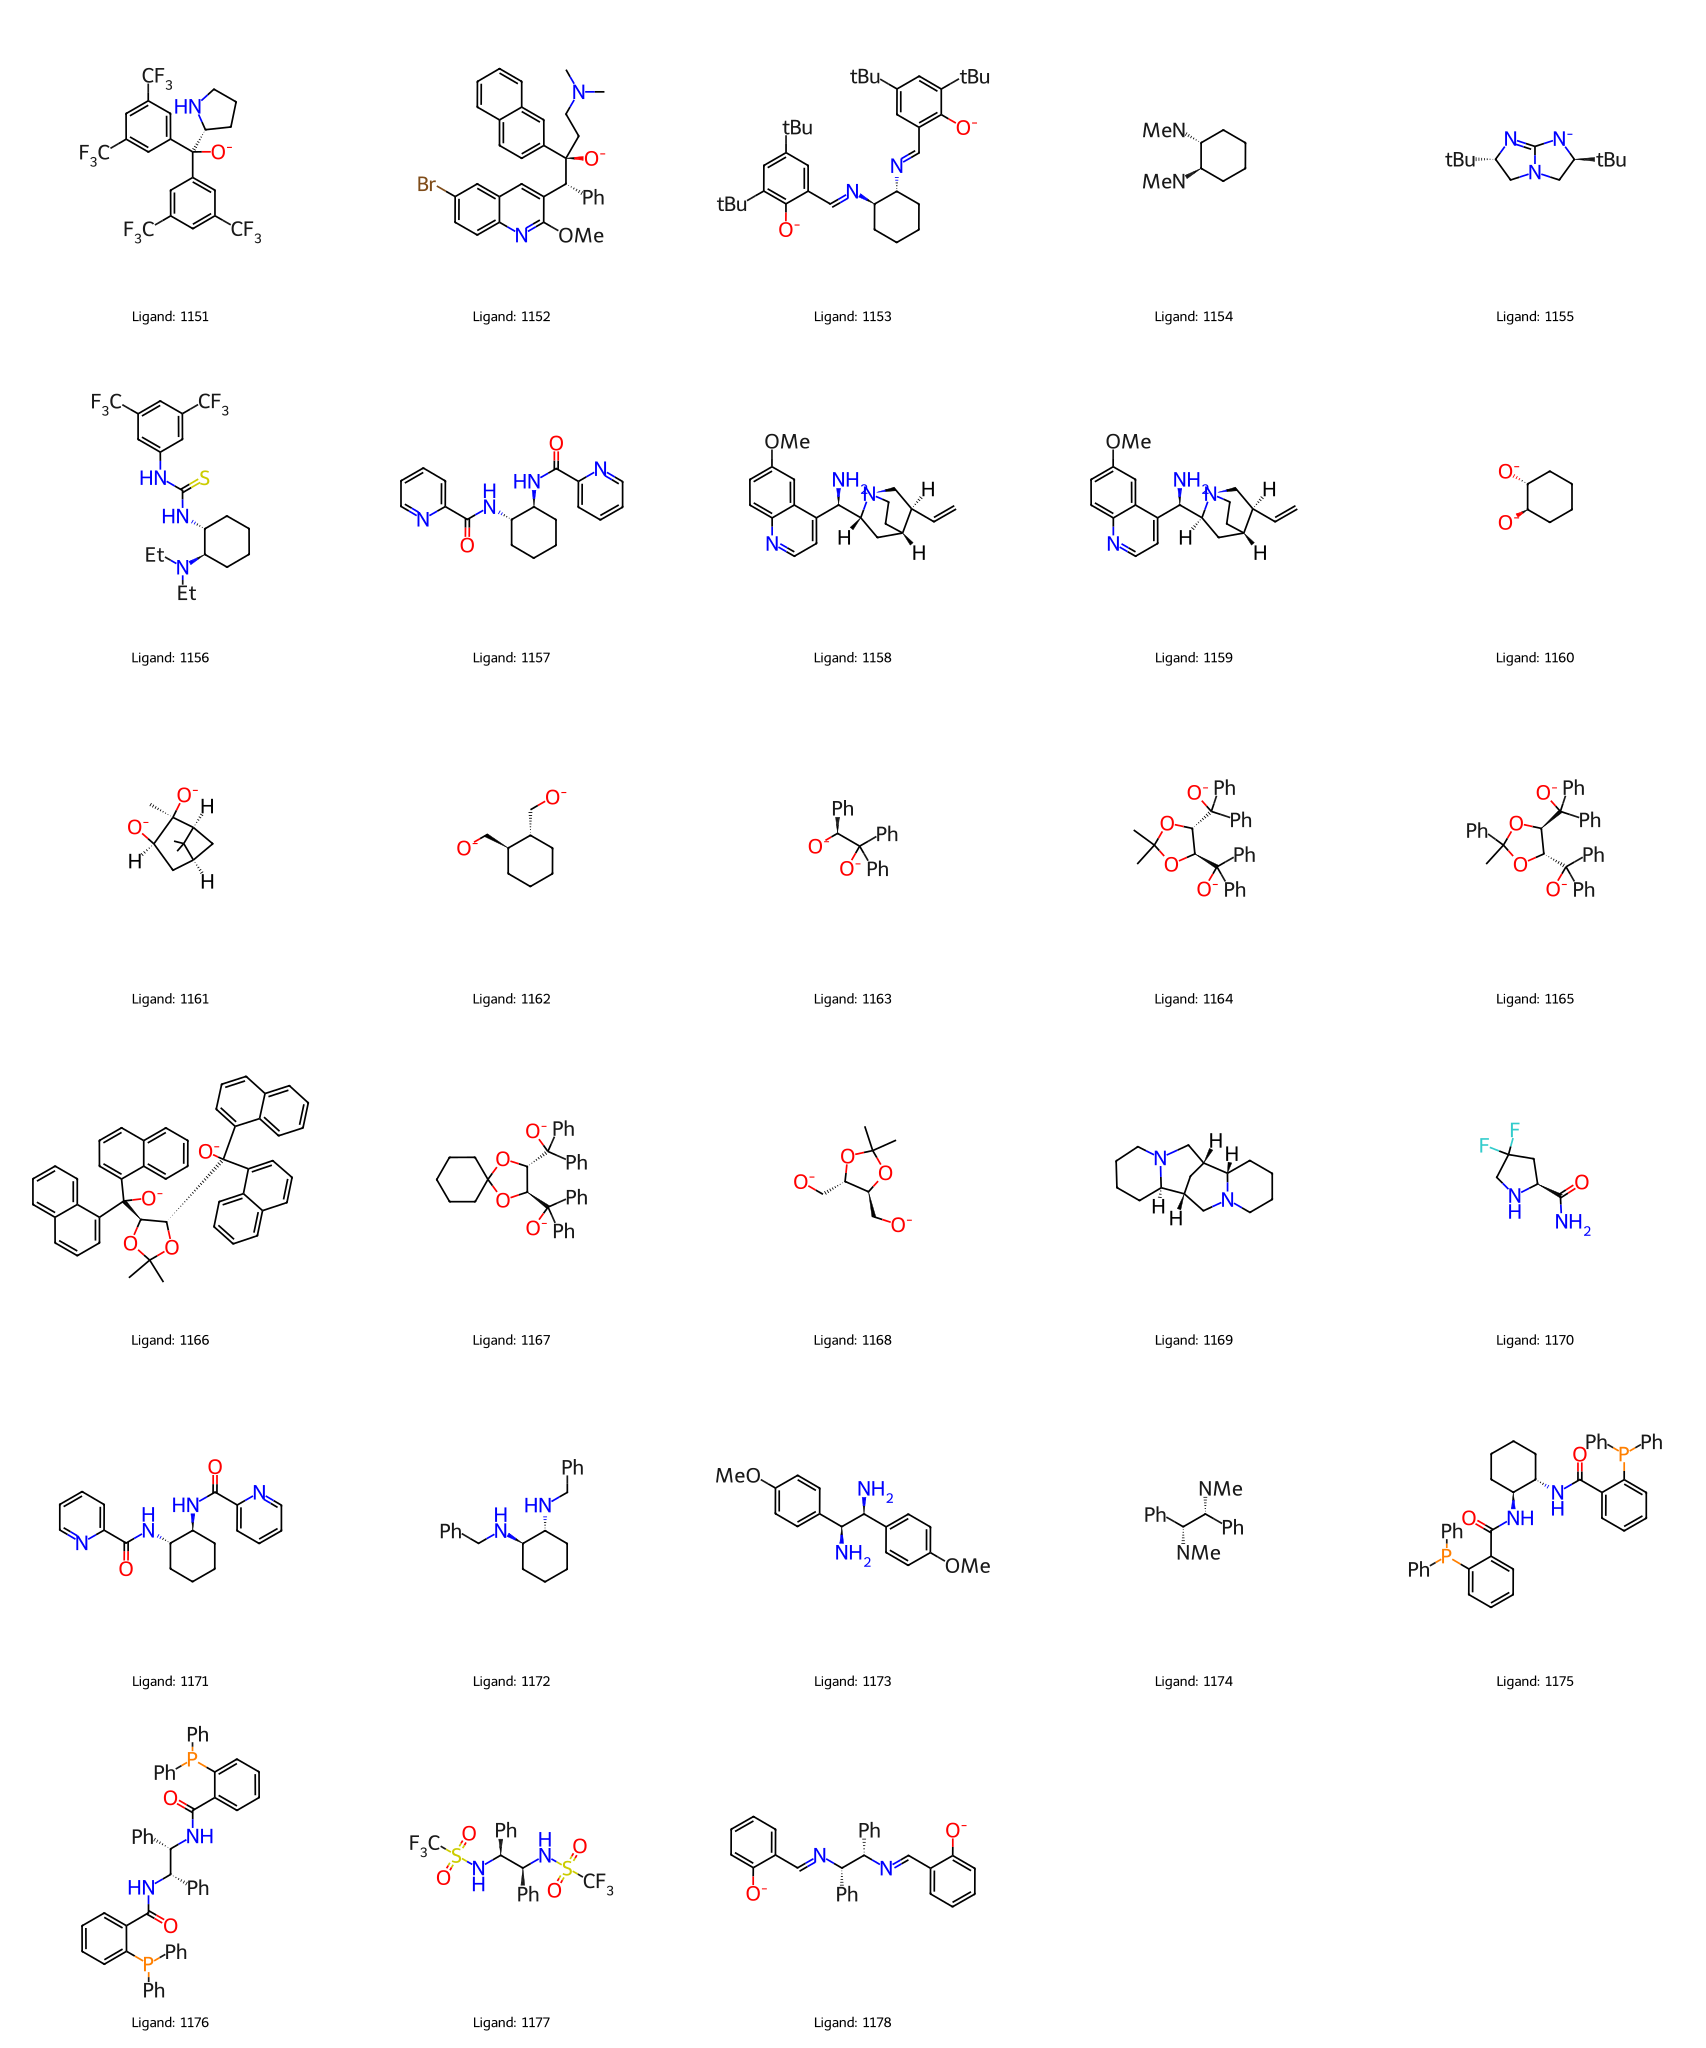

In [7]:

rdDepictor.SetPreferCoordGen(True)
start_id = 150
end_id = start_id + 50
csv_ = ligand_csv

aligned_queries = []
mols = [rdAbbreviations.CondenseMolAbbreviations(Chem.MolFromSmiles(each), abbrevs, maxCoverage=1) for each in csv_['Smiles']][start_id:end_id]
# for mol in mols:
#     AllChem.Compute2DCoords(mol)  # 先计算初始坐标
#     AllChem.GenerateDepictionMatching2DStructure(mol, template)  # 匹配模板
#     aligned_queries.append(mol)
# mols = aligned_queries
Chem.Draw.MolsToGridImage(mols, 
                          molsPerRow=5, subImgSize=(400, 400), useSVG=True, 
                          legends = ["Ligand: " + str(each) for each in csv_['Index']][start_id:end_id], 
                          drawOptions=opts)

In [33]:
pattens = ['C1(CC2=NCCO2)=NCCO1', 'C1(C2=NCCO2)=NC(C3=NCCO3)=CC=C1', "C1(C2=NCCO2)=N[C@H2]CO1", "C1(C2=NCCO2)=CC=CC=N1", "C1(C2=NCCN2)=NCCN1"]
pattens = [Chem.MolToSmiles(Chem.MolFromSmiles(each)) for each in pattens]
pattens

['C1COC(CC2=NCCO2)=N1',
 'c1cc(C2=NCCO2)nc(C2=NCCO2)c1',
 'C1COC(C2=NCCO2)=N1',
 'c1ccc(C2=NCCO2)nc1',
 'C1CNC(C2=NCCN2)=N1']

In [34]:
pattens = ['C1COC(CC2=NCCO2)=N1', 'c1cc(C2=NCCO2)nc(C2=NCCO2)c1', 'C1COC(C2=NCCO2)=N1', 'c1ccc(C2=NCCO2)nc1', 'C1CNC(C2=NCCN2)=N1']
pattens = [Chem.MolToSmiles(Chem.MolFromSmiles(each)) for each in pattens]
isother = True
all_ligand_split = [[] for each in range(len(pattens) + 2)]
all_ligand_id = [[] for each in range(len(pattens) + 2)]
for row_id, row in ligand_csv.iterrows():
    for pattens_id, patten in enumerate(pattens):
        if Chem.MolFromSmiles(row['Smiles']).HasSubstructMatch(Chem.MolFromSmarts(patten)):
            isother = False
            all_ligand_split[pattens_id].append(row['Smiles'])
            all_ligand_id[pattens_id].append(row['Index'])
            break
    if isother:
        if row['Type'] == 'Ligand_Box':
            all_ligand_split[-2].append(row['Smiles'])
            all_ligand_id[-2].append(row['Index'])
        else:
            all_ligand_split[-1].append(row['Smiles'])
            all_ligand_id[-1].append(row['Index'])
    isother = True
[len(each) for each in all_ligand_split]

[61, 7, 8, 31, 7, 25, 39]

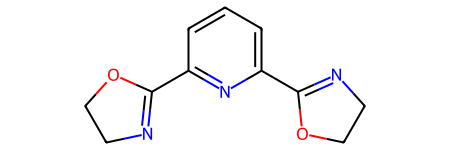

In [30]:
Chem.MolFromSmiles(pattens[1])

In [ ]:
from rdkit.Chem import AllChem, rdFMCS
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(False)
start_id = 0
split_id = 0
end_id = start_id + 50
csv_ = ligand_csv

mols = [rdAbbreviations.CondenseMolAbbreviations(Chem.MolFromSmiles(each), abbrevs, maxCoverage=1) for each in all_ligand_split[split_id]][start_id:end_id]
# template = Chem.MolFromSmiles(pattens[split_id])
template = Chem.MolFromMolFile(f"Figure/ligand_patten{split_id}.mol")
# AllChem.Compute2DCoords(template)
aligned_queries = []
for mol in mols:
    AllChem.Compute2DCoords(mol)
    # mcs = rdFMCS.FindMCS([template, mol])
    # patt = Chem.MolFromSmarts(mcs.smartsString)
    # query_match = mol.GetSubstructMatch(patt)
    # template_match = template.GetSubstructMatch(patt)
    # AllChem.AlignMol(mol, template, atomMap=list(zip(query_match, template_match)))
    AllChem.GenerateDepictionMatching2DStructure(mol, template)  # 匹配模板
    aligned_queries.append(mol)
mols = aligned_queries
Chem.Draw.MolsToGridImage(mols, 
                          molsPerRow=5, subImgSize=(400, 400), useSVG=True, 
                          legends = ["Ligand: " + str(each) for each in all_ligand_id[split_id]][start_id:end_id], 
                          drawOptions=opts)

ValueError: Depict error: Substructure match with reference not found.


     RDKit          2D

 11 12  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.5118    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.2618    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.5118    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4558   -0.9800    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9231   -1.2918    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6731    0.0072    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6694    1.1219    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.4558   -0.9801   -0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.9230   -1.2920   -0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6730    0.0070   -0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6694    1.1219    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  1  8  2  0
  8  9  1  0
  9 10  1  0
 10 11  1  0
 11  1  1  0
  7  3  1  0
M  END
